## Notebook Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, acf

## Data Loading

In [2]:
df = pd.read_csv("forecast.csv", parse_dates=[0])
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


## Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.index = df["fulldate"]

In [6]:
df.head()

,fulldate,tmax,sysload,gasprice,elecprice
fulldate,,,,,
2010-09-01 00:00:00,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


**Naive plot to skim for trends or seasonality**

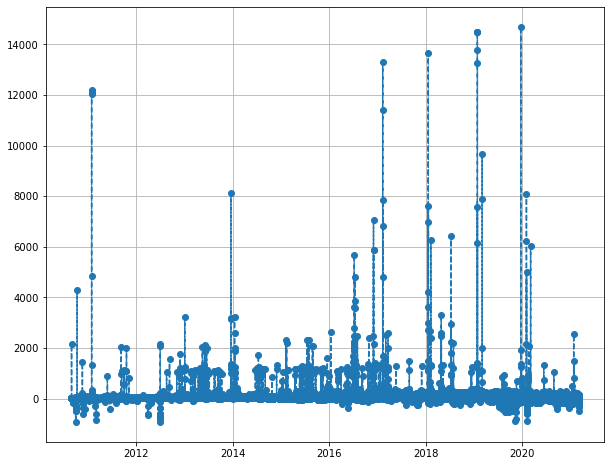

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df.elecprice, '--', marker="o")
plt.grid()

**Missing Values Check**

In [8]:
df.isnull().sum()

fulldate     0
tmax         0
sysload      0
gasprice     0
elecprice    0
dtype: int64

**Resampling**

In [9]:
df_quarter_mean = df.resample("3M").mean()
df_quarter_sum = df.resample("3M").sum()

Text(0.5, 1.0, 'Total Electricity Costs per Quarter')

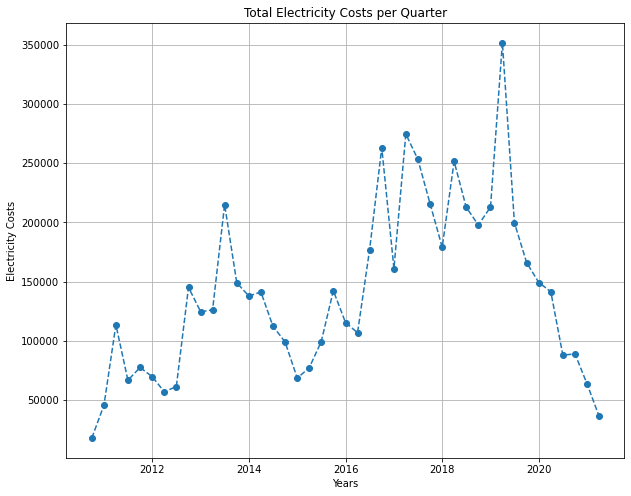

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(df_quarter_sum.index, df_quarter_sum.elecprice, '--', marker="o")
plt.grid()

plt.xlabel("Years")
plt.ylabel("Electricity Costs")
plt.title("Total Electricity Costs per Quarter")

Text(0.5, 1.0, 'Average Electricity Costs per Quarter')

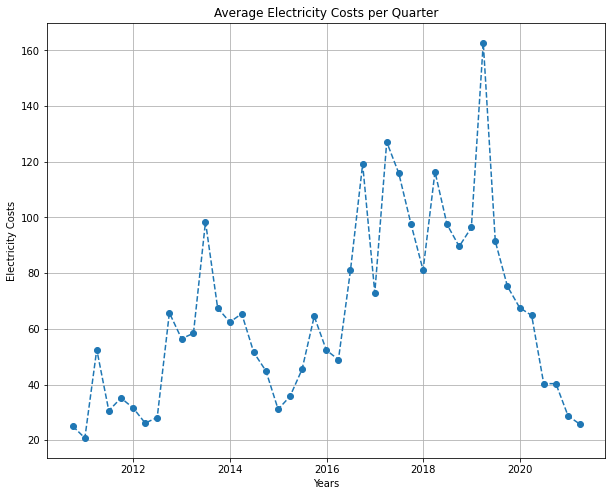

In [11]:
plt.figure(figsize=(10, 8))
plt.plot(df_quarter_mean.index, df_quarter_mean.elecprice, '--', marker="o")
plt.grid()

plt.xlabel("Years")
plt.ylabel("Electricity Costs")
plt.title("Average Electricity Costs per Quarter")

## Decompose Series

In [12]:
decompose_series = seasonal_decompose(
  df_quarter_sum["elecprice"], model="additive"
)

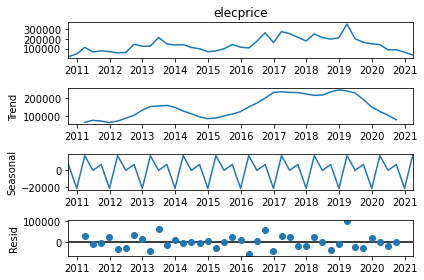

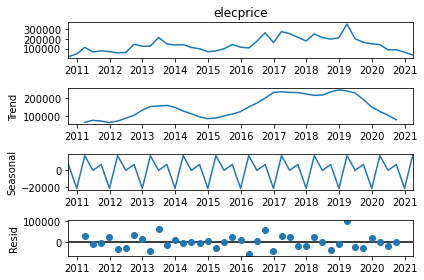

In [13]:
decompose_series.plot()

In [14]:
adf_result = adfuller(df_quarter_sum["elecprice"])

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"No. of lags used: {adf_result[2]}")
print(f"No. of observations used: {adf_result[3]}")
print("Critical Values")
for k, v in adf_result[4].items():
  print(f"  {k}:{v}")

ADF Statistic: -1.9782297786746734
p-value: 0.29619939422167696
No. of lags used: 4
No. of observations used: 38
Critical Values
  1%:-3.6155091011809297
  5%:-2.941262357486514
  10%:-2.6091995013850418


**Making Data Stationary**

In [15]:
df_quarter_log = np.log(df_quarter_sum)
df_quarter_diff = df_quarter_log.diff(1).dropna(axis=0)
df_quarter_diff

,tmax,sysload,gasprice,elecprice
fulldate,,,,
2010-12-31,1.476357,0.941880,0.765808,0.932471
2011-03-31,0.129169,-0.105440,0.280838,0.906032
2011-06-30,-0.375554,-0.050238,0.141461,-0.529876
2011-09-30,-0.040817,-0.064592,0.010212,0.149680
2011-12-31,0.345598,-0.024245,-0.126181,-0.106741
2012-03-31,3.774591,0.036933,0.026508,-0.200067
2012-06-30,-4.071794,0.031806,0.178426,0.073417
2012-09-30,-0.112926,-0.066617,0.348260,0.859558
2012-12-31,0.440386,-0.032833,-0.309657,-0.152542


In [16]:
adf_result = adfuller(df_quarter_diff['elecprice'])

print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"No. of lags used: {adf_result[2]}")
print(f"No. of observations used: {adf_result[3]}")
print("Critical Values")
for k, v in adf_result[4].items():
  print(f"  {k}:{v}")

ADF Statistic: -6.761775722730555
p-value: 2.7805037405977267e-09
No. of lags used: 0
No. of observations used: 41
Critical Values
  1%:-3.60098336718852
  5%:-2.9351348158036012
  10%:-2.6059629803688282


In [17]:
decompose_diff = seasonal_decompose(
  df_quarter_diff['elecprice'], model="additive"
)

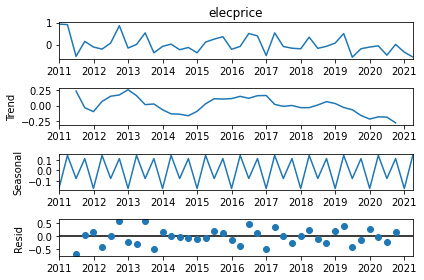

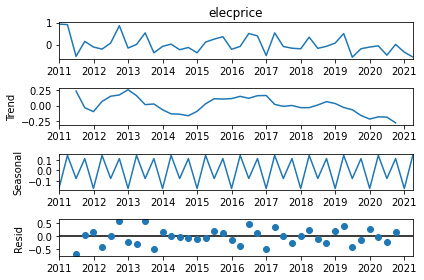

In [18]:
decompose_diff.plot()

In [19]:
df_quarter_diff

,tmax,sysload,gasprice,elecprice
fulldate,,,,
2010-12-31,1.476357,0.941880,0.765808,0.932471
2011-03-31,0.129169,-0.105440,0.280838,0.906032
2011-06-30,-0.375554,-0.050238,0.141461,-0.529876
2011-09-30,-0.040817,-0.064592,0.010212,0.149680
2011-12-31,0.345598,-0.024245,-0.126181,-0.106741
2012-03-31,3.774591,0.036933,0.026508,-0.200067
2012-06-30,-4.071794,0.031806,0.178426,0.073417
2012-09-30,-0.112926,-0.066617,0.348260,0.859558
2012-12-31,0.440386,-0.032833,-0.309657,-0.152542


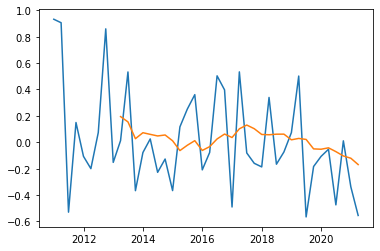

In [20]:
plt.plot(
  df_quarter_diff.index, df_quarter_diff.elecprice,
)
plt.plot(
  df_quarter_diff.elecprice.rolling(10).mean()
)

/home/xviix/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


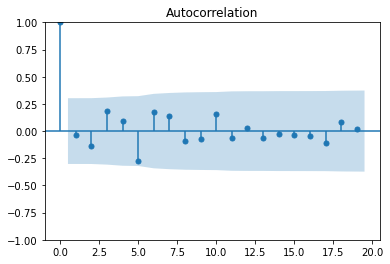

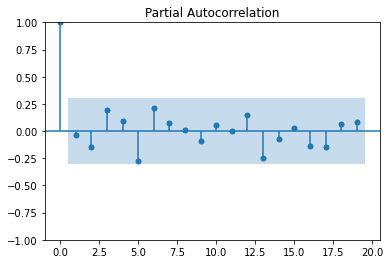

In [21]:
plot_acf(df_quarter_diff.elecprice, lags=range(0, 20))
plot_pacf(df_quarter_diff.elecprice, lags=range(0, 20))
plt.show()

In [22]:
from statsmodels.tsa.arima.model import ARIMA

ar_model = ARIMA(df_quarter_diff.elecprice, order=(0, 0, 2))
ar_model_results = ar_model.fit()

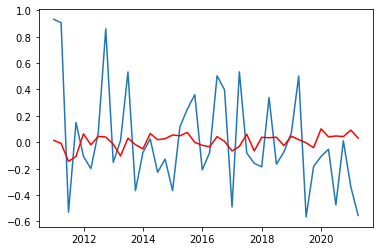

In [23]:
plt.plot(df_quarter_diff.elecprice)
plt.plot(ar_model_results.fittedvalues, color='red')

In [24]:
from prophet import Prophet

In [25]:
df_prophet = df.rename(columns={
  'fulldate':'ds',
  'elecprice': 'y'
})

In [26]:
df_prophet = df_prophet[['ds', 'y']]

In [27]:
model = Prophet()
model.fit(df_prophet)

14:08:12 - cmdstanpy - INFO - Chain [1] start processing
14:09:42 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
future = model.make_future_dataframe(periods=10, freq="M")
forecast = model.predict(future)
forecast.head()

In [ ]:
model.plot(forecast)